<h1 align = "center"> CS 134 Pset 3 </h1>
<h3 align = "center"> Christine Zhang </h3>

---

### Part 5a
---

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in values and transform into matrix format
network1 = pd.read_csv('network1.txt', delimiter = " ", names = ["node1", "node2"])
network2 = pd.read_csv('network2.txt', delimiter = " ", names = ["node1", "node2"])
network1 = network1.as_matrix()
network2 = network2.as_matrix()

In [3]:
# create dictionary with counts
def create_dict (network):
    [[x, network.count(x)] for x in set(network)]
    d = dict((x, network.count(x)) for x in set(network))
    return d

In [4]:
d_network1 = create_dict (list(network1[:,0]))
d_network2 = create_dict (list(network2[:,0]))

In [5]:
def power_law_plot (network, index, dictionary): 
    
    # calculate degree distribution and fraction of nodes
    x_values, y_values  = [], []
    x_values = dictionary.values()
    y_values_dict = create_dict(x_values)
    y_values = y_values_dict.values() 
    total_num = sum(y_values_dict.values())
    y_values = [float(each) / float(total_num) for each in y_values]
    x_values  = list(set(x_values))
    
    # generate plot
    plt.plot(x_values, y_values)
    plt.xlabel("Degree")
    plt.ylabel("Fraction of Nodes")
    plt.title("Degree Distribution of Network " + str(index))
    plt.show()
    
    return x_values, y_values

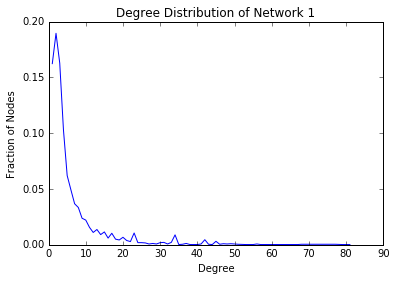

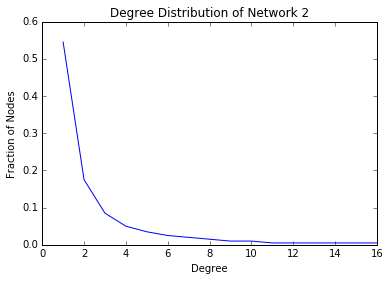

In [6]:
x_values_1, y_values_1 = power_law_plot(network1, 1, d_network1)
x_values_2, y_values_2 = power_law_plot(network2, 2, d_network2)

### Part 5b
---

In [7]:
def power_law_log (x_values, y_values, index): 
    
    # take log values
    x_values_log = [math.log(each) for each in x_values]
    y_values_log = [math.log(each) for each in y_values]
    
    #generate plot
    plt.plot(x_values_log, y_values_log)
    plt.xlabel("Log Degree")
    plt.ylabel("Log Fraction of Nodes")
    plt.title("Log Scale Degree Distribution of Network " + str(index))
    plt.show()
    
    return x_values_log, y_values_log

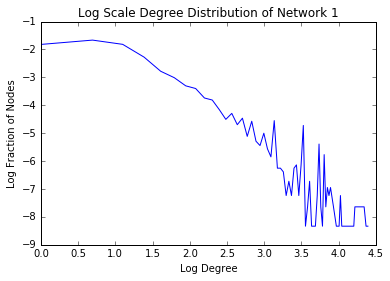

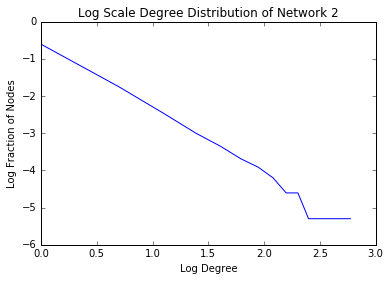

In [8]:
x_values_log_1, y_values_log_1 = power_law_log (x_values_1, y_values_1, 1)
x_values_log_2, y_values_log_2 = power_law_log (x_values_2, y_values_2, 2)

### Part 5c
---

In [9]:
def OLS (x_values, y_values, index):
    coeffs = np.polyfit(x_values, y_values, 1)
    f = lambda x : coeffs[0]*x + coeffs[1]
    plt.plot(x_values, y_values)
    plt.plot(x_values, map(f, x_values))
    plt.xlabel("Log Degree")
    plt.ylabel("Log Fraction of Nodes")
    plt.title("OLS of Network " + str(index))
    plt.show()
    
    print "Network", str(index), "OLS Alpha Value:", coeffs[0]*-1
    print "Network", str(index), "OLS Y-intercept:", coeffs[1]
    return coeffs

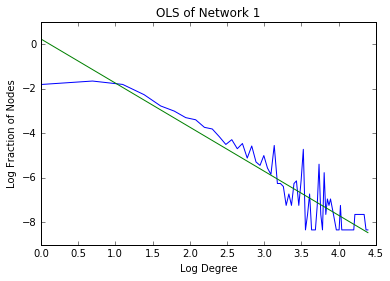

Network 1 OLS Alpha Value: 1.97409568097
Network 1 OLS Y-intercept: 0.220234973427


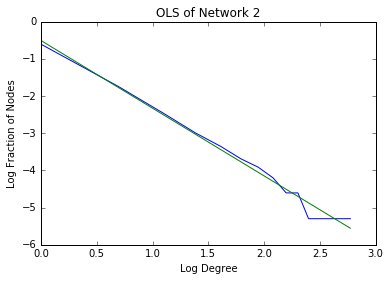

Network 2 OLS Alpha Value: 1.82035669278
Network 2 OLS Y-intercept: -0.508144286718


In [10]:
coeffs_OLS_1 = OLS (x_values_log_1, y_values_log_1, 1)
coeffs_OLS_2 = OLS (x_values_log_2, y_values_log_2, 2)

### Part 5d
---

In [11]:
def MLE (nodes):
    x_min = min(nodes)
    n = len(nodes)
    sum_total = 0
    for each in xrange(0, n):
        sum_total += math.log(nodes[each]/x_min)
    alpha = 1 + n * (sum_total)**(-1)
    return alpha

In [12]:
alpha_MLE_1 = MLE(d_network1.values())
print "Network 1 MLE alpha:", alpha_MLE_1
alpha_MLE_2 = MLE(d_network2.values())
print "Network 2 MLE alpha:", alpha_MLE_2

Network 1 MLE alpha: 1.74219107727
Network 2 MLE alpha: 2.72990330106


### Part 5e
---

In [13]:
def power_law (x_values, y_values, c, alpha, alpha_type, index):
    f = lambda x: c*x**(-alpha)
    plt.plot(x_values, map(f, x_values))
    plt.plot(x_values, y_values)
    plt.xlabel("Degree")
    plt.ylabel("Fraction of Nodes")
    plt.title("Power Law " + alpha_type + " Alpha of Network " + str(index))
    plt.show()

In [16]:
c_OLS_1 = (-coeffs_OLS_1[0] - 1)/(1**(coeffs_OLS_1[0] + 1))
c_OLS_2 = (-coeffs_OLS_2[0] - 1)/(1**(coeffs_OLS_2[0] + 1))
c_MLE_1 = (alpha_MLE_1 - 1)/(1**(alpha_MLE_1 + 1))
c_MLE_2 = (alpha_MLE_2 - 1)/(1**(alpha_MLE_2 + 1))

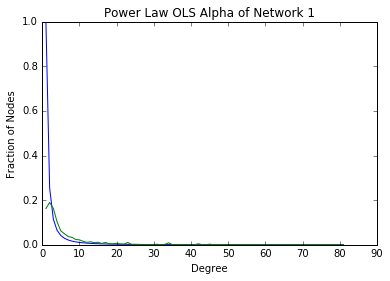

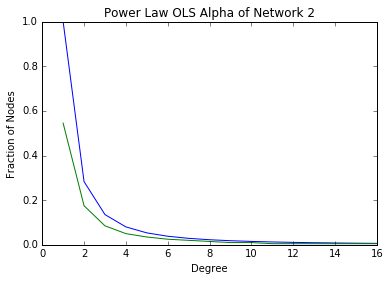

In [17]:
power_law (x_values_1, y_values_1, 1, -coeffs_OLS_1[0], "OLS", 1)
power_law (x_values_2, y_values_2, 1, -coeffs_OLS_2[0], "OLS", 2)

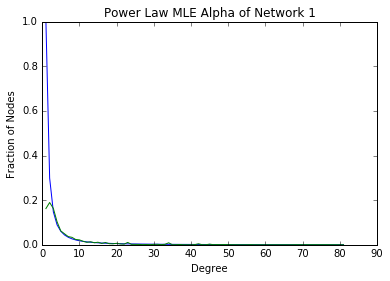

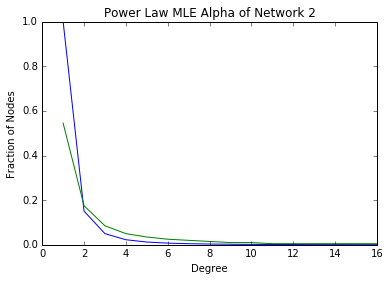

In [18]:
power_law (x_values_1, y_values_1, 1, alpha_MLE_1, "MLE", 1)
power_law (x_values_2, y_values_2, 1, alpha_MLE_2, "MLE", 2)